In [1]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
%matplotlib inline
originalData = pd.read_csv("tomslee_airbnb_new_york_1196_2017-05-06.csv")
originalData = originalData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
                          'price', 'longitude','latitude','property_type']]


originalData = originalData[originalData.overall_satisfaction.map(lambda x:not math.isnan(x))]
originalData = originalData[originalData.reviews.map(lambda x:x is not 0)]
originalData = originalData[originalData.price.map(lambda x: x<2000)]
originalData.reset_index(drop = True, inplace=True)
display(originalData.describe())
display(originalData.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Shared room,Manhattan,5,3,4.5,1.0,240.0,-73.956041,40.772774,Apartment
1,Shared room,Manhattan,2,4,5.0,1.0,110.0,-73.954550,40.771820,Apartment
2,Shared room,Manhattan,2,3,5.0,1.0,105.0,-73.943941,40.780694,Apartment
3,Shared room,Manhattan,3,7,4.5,1.0,114.0,-73.943762,40.786761,Apartment
4,Shared room,Brooklyn,2,1,0.0,1.0,99.0,-73.982937,40.694308,Apartment


In [2]:
print(originalData.columns)
display(originalData.describe())
display(originalData['borough'].value_counts())
display(originalData['room_type'].value_counts())
display(originalData['property_type'].value_counts())

Index(['room_type', 'borough', 'accommodates', 'reviews',
       'overall_satisfaction', 'bedrooms', 'price', 'longitude', 'latitude',
       'property_type'],
      dtype='object')


,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


Manhattan        14698
Brooklyn         12723
Queens            3033
Bronx              485
Staten Island      193
Name: borough, dtype: int64

Entire home/apt    15954
Private room       14348
Shared room          830
Name: room_type, dtype: int64

Apartment             26499
House                  2798
Loft                    677
Townhouse               454
Condominium             268
Other                   157
Bed & Breakfast         131
Guesthouse               32
Timeshare                23
Hostel                   19
Villa                    15
Bungalow                 12
Dorm                     12
Boutique hotel           10
Serviced apartment        5
Guest suite               4
Boat                      4
Cabin                     3
Castle                    2
In-law                    1
Lighthouse                1
Vacation home             1
Cave                      1
Hut                       1
Chalet                    1
Earth House               1
Name: property_type, dtype: int64

In [20]:
sampledData = originalData.sample(frac=0.1).reset_index(drop=True)
usefulData = sampledData.sample(frac=1).reset_index(drop=True)
broughChosen = ['Manhattan', 'Brooklyn']
data = usefulData[usefulData['borough'].map(lambda x: x in broughChosen)]

In [21]:
# usefulData = sampledData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
#                            'price', 'longitude']]
# usefulData = sampledData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price']]
display(data.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
2,Private room,Brooklyn,2,15,5.0,1.0,51.0,-73.939681,40.669116,House
3,Private room,Manhattan,2,20,5.0,1.0,95.0,-73.963130,40.799985,Apartment
4,Private room,Manhattan,2,4,5.0,1.0,75.0,-73.943779,40.836865,Apartment
5,Private room,Brooklyn,4,9,5.0,1.0,95.0,-73.953324,40.687866,House
6,Private room,Brooklyn,2,1,0.0,1.0,85.0,-73.948148,40.641376,House


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,longitude,latitude,property_type
0,Private room,Brooklyn,2,3,4.5,1.0,-73.955804,40.717159,Apartment
1,Private room,Brooklyn,2,35,4.5,1.0,-73.902597,40.674006,Apartment
2,Entire home/apt,Brooklyn,2,7,4.5,0.0,-73.959643,40.646016,Apartment
3,Entire home/apt,Brooklyn,6,1,0.0,4.0,-73.968971,40.687230,House
4,Entire home/apt,Manhattan,2,3,4.5,1.0,-73.986971,40.721183,Apartment


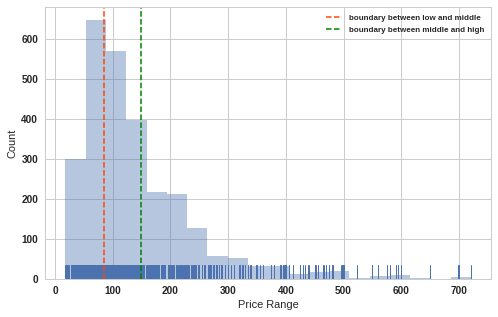

In [22]:
# view the distribution of price for the labeling later
tmp = data[data.price.map(lambda x: x<750)]
pricePlt = sns.distplot(tmp['price'].sort_values(), bins=20, kde=False, rug=True)
pricePlt.set_xlabel('Price Range')
pricePlt.set_ylabel('Count')
pricePlt.figure.set_size_inches(8,5)
plt.axvline(x = 85, linewidth=1.5, color = 'orangered',linestyle="--", label = 'boundary between low and middle')
plt.axvline(x = 149, linewidth=1.5, color = 'green',linestyle="--", label = 'boundary between middle and high')
plt.legend(loc = 'upper right',prop={'size':8})
data.reset_index(drop = True, inplace=True)
display(data_p1.head())

In [23]:
lableLow = data['price'].map(lambda x: x <85)
lableMid = data['price'].map(lambda x: x<=149 and x >= 85)
lableHigh = data['price'].map(lambda x: x >149)
print(lableLow.value_counts(),lableMid.value_counts(), lableHigh.value_counts())
p1_price = data['price']
data_p1 = data.drop(axis=1,labels=['price'])

False    1867
True      873
Name: price, dtype: int64 False    1815
True      925
Name: price, dtype: int64 False    1798
True      942
Name: price, dtype: int64


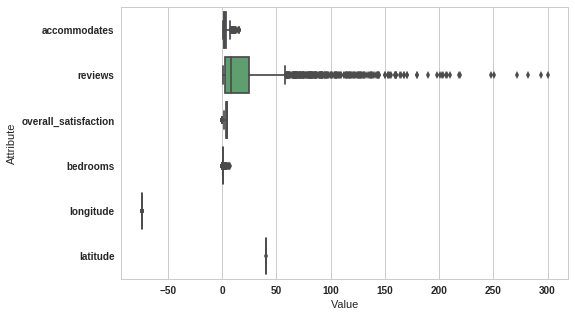

In [24]:
data_p1_coded = pd.get_dummies(data_p1)
sns.set_style("whitegrid")
plot = sns.boxplot(data=data_p1_coded.iloc[:,0:6], orient='h')
plot.set_yticklabels(data_p1_coded.columns);
plot.set_xlabel('Value')
plot.set_ylabel('Attribute')
plot.figure.set_size_inches(8,5)

In [25]:
data1 = np.array(data_p1_coded)
display(data_p1_coded.tail().iloc[:3,:9])
x = (data1-data1.mean(axis=0))/data1.std(axis=0)
tmp = pd.DataFrame(x)
display(tmp.head())

,accommodates,reviews,overall_satisfaction,bedrooms,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2735,2,9,5.0,1.0,-73.962792,40.710719,1,0,0
2736,2,3,5.0,1.0,-73.981040,40.781156,1,0,0
2737,10,13,4.5,3.0,-74.000603,40.723693,1,0,0


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.534227,-0.199531,0.711414,-0.237719,0.916832,-1.152028,-1.106357,1.160991,-0.155882,1.060203,...,-0.019108,-0.103427,-0.027027,-0.033107,-0.027027,3.748993,-0.168904,-0.057406,-0.019108,-0.115385
1,-0.534227,-0.052041,0.711414,-0.237719,0.012476,1.373982,-1.106357,1.160991,-0.155882,-0.943215,...,-0.019108,-0.103427,-0.027027,-0.033107,-0.027027,-0.266738,-0.168904,-0.057406,-0.019108,-0.115385
2,-0.534227,-0.524007,0.711414,-0.237719,0.758784,2.085833,-1.106357,1.160991,-0.155882,-0.943215,...,-0.019108,-0.103427,-0.027027,-0.033107,-0.027027,-0.266738,-0.168904,-0.057406,-0.019108,-0.115385
3,0.517718,-0.376518,0.711414,-0.237719,0.390663,-0.790119,-1.106357,1.160991,-0.155882,1.060203,...,-0.019108,-0.103427,-0.027027,-0.033107,-0.027027,3.748993,-0.168904,-0.057406,-0.019108,-0.115385
4,-0.534227,-0.612501,-1.733123,-0.237719,0.590286,-1.687460,-1.106357,1.160991,-0.155882,1.060203,...,-0.019108,-0.103427,-0.027027,-0.033107,-0.027027,3.748993,-0.168904,-0.057406,-0.019108,-0.115385


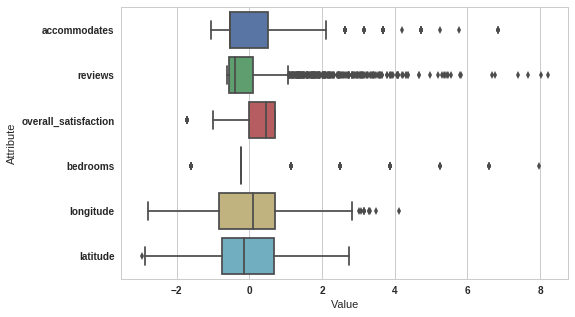

In [26]:
# plt.boxplot(x,vert=False);
plotNorm = sns.boxplot(data=x[:,0:6], orient='h')
plotNorm.set_yticklabels(data_p1_coded.columns);
# plotNorm.figure.set_size_inches(10,5)
plotNorm.set_xlabel('Value')
plotNorm.set_ylabel('Attribute')
plotNorm.figure.set_size_inches(8,5)

In [47]:
covMatrix = x.transpose().dot(x)/x.shape[0]
(eigenVals,eigneVectors)= np.linalg.eig(covMatrix)
idx = eigenVals.argsort()[::-1]   
eigenVals = eigenVals[idx]
eigneVectors = eigneVectors[:,idx]
totalEigenval = []
tmp = 0
eigenvalSum = sum(eigenVals)
for val in eigenVals:
    tmp += val
    totalEigenval.append(tmp/eigenvalSum)
print(totalEigenval)

[0.13879232987667767, 0.24895727914342136, 0.3256104180532261, 0.38316751360944362, 0.43730034512867649, 0.48537525193129799, 0.5299056656962482, 0.57392436049825002, 0.61775123961961331, 0.6614097267754584, 0.70498524540819263, 0.74850021944694778, 0.79187238071823773, 0.83474005554873243, 0.87624987855898318, 0.91636499494963464, 0.95395630237790086, 0.982248945929863, 0.99358911834124641, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0]


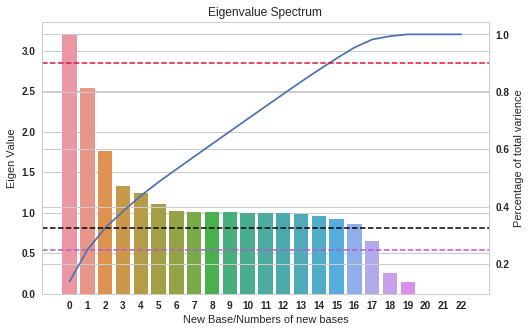

In [30]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals))),y=eigenVals, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('Percentage of total varience')
ax2.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
ax2.axhline(y = totalEigenval[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
ax2.axhline(y = totalEigenval[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')
plt.savefig('images/eigenvalues1.png', format='png', dpi=200)

In [31]:
col = data_p1_coded.columns
for eigneVector in eigneVectors[:,0:3].transpose():
    idx = abs(eigneVector).argsort()[::-1]  
    print(col[idx], eigneVector[idx])

Index(['borough_Manhattan', 'borough_Brooklyn', 'latitude',
       'property_type_Apartment', 'longitude', 'property_type_House',
       'room_type_Private room', 'room_type_Entire home/apt',
       'property_type_Loft', 'accommodates', 'property_type_Townhouse',
       'property_type_Bed & Breakfast', 'overall_satisfaction', 'bedrooms',
       'property_type_Guesthouse', 'property_type_Cave', 'property_type_Other',
       'property_type_Condominium', 'property_type_Hostel',
       'property_type_Timeshare', 'room_type_Shared room', 'reviews',
       'property_type_Dorm'],
      dtype='object') [ 0.50812693 -0.50812693  0.41704482  0.2669653  -0.26452548 -0.26304081
 -0.20476543  0.20138216 -0.09206331  0.05572921 -0.0410312  -0.03363644
  0.02737508 -0.02663508 -0.01437868 -0.01286575 -0.01176354 -0.01056026
  0.00989223  0.00863919  0.00705452  0.00628348  0.00549953]
Index(['accommodates', 'room_type_Entire home/apt', 'room_type_Private room',
       'bedrooms', 'property_type_Apart

In [33]:
# x is actually X^T
X_tilde1 = x.dot(eigneVectors[:,:3])
X_tilde1 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde1['price'] = p1_price

In [136]:
def priceLabel(price):
    if price < 85:
        return 'low'
    elif price >= 149:
        return 'high'
    else:
        return 'middle'
X_tilde1['label'] = X_tilde1['price'].map(priceLabel)
color1 = {'high':'mediumorchid','middle':'darkorange', 'low':'deepskyblue'}
labels1 = ['high', 'middle', 'low']
dfList = []
for label in labels1:
    dfList.append(X_tilde1[X_tilde1.label.map(lambda x: x == label)])

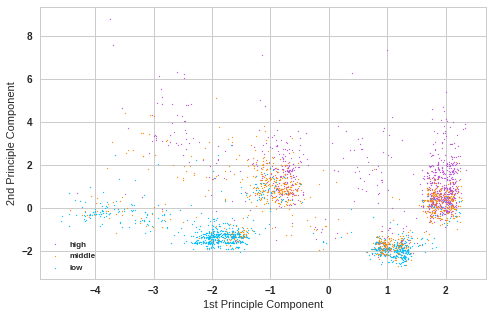

In [137]:
for (df, label) in zip(dfList, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 1, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-2d.png', format='png', dpi=200)

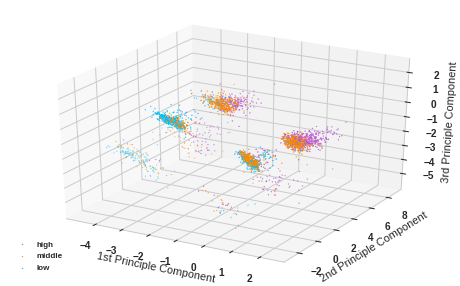

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList, labels1):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 1, c=color1[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-3d.png', format='png', dpi=200)
plt.show()

### Label overall satisfiction

In [104]:
display(data.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Private room,Brooklyn,2,15,5.0,1.0,51.0,-73.939681,40.669116,House
1,Private room,Manhattan,2,20,5.0,1.0,95.0,-73.963130,40.799985,Apartment
2,Private room,Manhattan,2,4,5.0,1.0,75.0,-73.943779,40.836865,Apartment
3,Private room,Brooklyn,4,9,5.0,1.0,95.0,-73.953324,40.687866,House
4,Private room,Brooklyn,2,1,0.0,1.0,85.0,-73.948148,40.641376,House


In [105]:
overall_sa = data["overall_satisfaction"]
data_p2 = data.drop(axis=1,labels=["overall_satisfaction"])

In [106]:
data_p2.head()

,room_type,borough,accommodates,reviews,bedrooms,price,longitude,latitude,property_type
0,Private room,Brooklyn,2,15,1.0,51.0,-73.939681,40.669116,House
1,Private room,Manhattan,2,20,1.0,95.0,-73.963130,40.799985,Apartment
2,Private room,Manhattan,2,4,1.0,75.0,-73.943779,40.836865,Apartment
3,Private room,Brooklyn,4,9,1.0,95.0,-73.953324,40.687866,House
4,Private room,Brooklyn,2,1,1.0,85.0,-73.948148,40.641376,House


In [107]:
data_p2_coded = pd.get_dummies(data_p2)

In [108]:
data2 = np.array(data_p2_coded)
x2 = (data1-data1.mean(axis=0))/data1.std(axis=0)

In [109]:
covMatrix2 = x2.transpose().dot(x)/x2.shape[0]
(eigenVals2,eigneVectors2)= np.linalg.eig(covMatrix2)
idx = eigenVals2.argsort()[::-1]   
eigenVals2 = eigenVals2[idx]
eigneVectors2 = eigneVectors2[:,idx]
totalEigenval2 = []
tmp = 0
eigenvalSum2 = sum(eigenVals2)
for val in eigenVals2:
    tmp += val
    totalEigenval2.append(tmp/eigenvalSum2)
print(totalEigenval)

[0.13879232987667767, 0.24895727914342136, 0.3256104180532261, 0.38316751360944362, 0.43730034512867649, 0.48537525193129799, 0.5299056656962482, 0.57392436049825002, 0.61775123961961331, 0.6614097267754584, 0.70498524540819263, 0.74850021944694778, 0.79187238071823773, 0.83474005554873243, 0.87624987855898318, 0.91636499494963464, 0.95395630237790086, 0.982248945929863, 0.99358911834124641, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0]


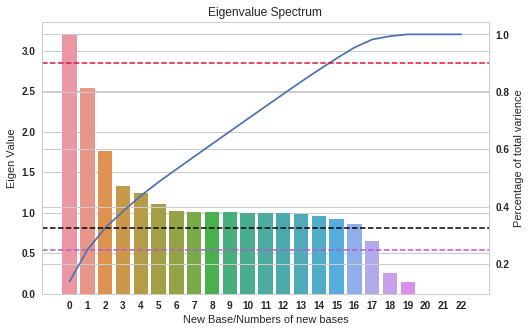

In [110]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals2))),y=eigenVals2, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('Percentage of total varience')
ax2.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
ax2.axhline(y = totalEigenval[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
ax2.axhline(y = totalEigenval[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')
plt.savefig('images/eigenvalues2.png', format='png', dpi=200)

In [111]:
col2 = data_p2_coded.columns
for eigneVector2 in eigneVectors2[:,0:3].transpose():
    idx = abs(eigneVector2).argsort()[::-1]  
    print(col2[idx], eigneVector2[idx])

Index(['borough_Manhattan', 'borough_Brooklyn', 'latitude',
       'property_type_Apartment', 'longitude', 'property_type_House',
       'room_type_Private room', 'room_type_Entire home/apt',
       'property_type_Loft', 'accommodates', 'property_type_Townhouse',
       'property_type_Bed & Breakfast', 'bedrooms', 'price',
       'property_type_Guesthouse', 'property_type_Cave', 'property_type_Other',
       'property_type_Condominium', 'property_type_Hostel',
       'property_type_Timeshare', 'room_type_Shared room', 'reviews',
       'property_type_Dorm'],
      dtype='object') [ 0.50812693 -0.50812693  0.41704482  0.2669653  -0.26452548 -0.26304081
 -0.20476543  0.20138216 -0.09206331  0.05572921 -0.0410312  -0.03363644
  0.02737508 -0.02663508 -0.01437868 -0.01286575 -0.01176354 -0.01056026
  0.00989223  0.00863919  0.00705452  0.00628348  0.00549953]
Index(['accommodates', 'room_type_Entire home/apt', 'room_type_Private room',
       'price', 'property_type_Apartment', 'latitude',

In [112]:
# x is actually X^T
X_tilde2 = x.dot(eigneVectors[:,:3])
X_tilde2 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde2['overall'] = overall_sa

In [113]:
X_tilde2.overall.value_counts()

5.0    1043
4.5     843
0.0     672
4.0     150
3.5      24
3.0       4
2.5       2
1.5       1
2.0       1
Name: overall, dtype: int64

In [114]:
print(X_tilde2.overall.value_counts())
def overallLabel(overall):
    if overall <= 4:
        return 'low'
    elif overall == 4.5:
        return 'median'
    else:
        return 'high'
X_tilde2['label'] = X_tilde2['overall'].map(overallLabel)
color2 = {'high':'mediumorchid','median':'darkorange', 'low':'deepskyblue'}
labels2 = ['high', 'median', 'low']
dfList2 = []
for label in labels2:
    dfList2.append(X_tilde2[X_tilde2.label.map(lambda x: x == label)])

5.0    1043
4.5     843
0.0     672
4.0     150
3.5      24
3.0       4
2.5       2
1.5       1
2.0       1
Name: overall, dtype: int64


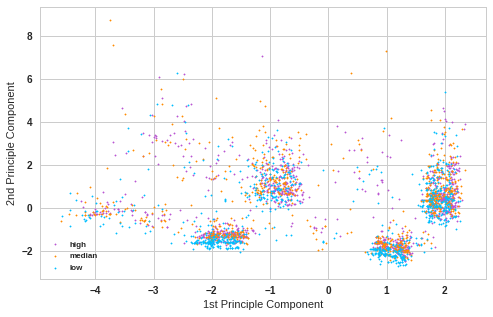

In [115]:
for (df, label) in zip(dfList2, labels2):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color2[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca2-2d.png', format='png', dpi=200)

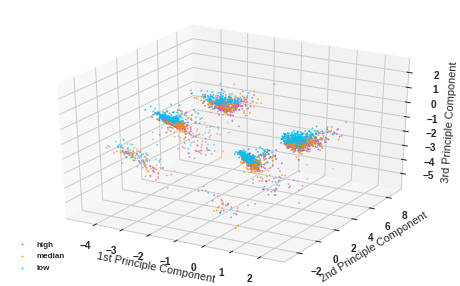

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList2, labels2):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 2, c=color[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca2-3d.png', format='png', dpi=200)
plt.show()

### Comparision of two borough

In [117]:
X_tilde1_b1 = X_tilde1[data.borough.map(lambda x: x == 'Manhattan')]
X_tilde1_b2 = X_tilde1[data.borough.map(lambda x: x == 'Brooklyn')]

In [118]:
X_tilde1.head()

,x,y,z,price,label
0,-3.926894,-0.175332,-2.369430,51.0,low
1,1.258783,-1.883503,-0.756144,95.0,middle
2,1.355274,-2.066252,-0.755576,75.0,low
3,-3.579265,0.327950,-2.506108,95.0,middle
4,-4.133328,-0.352622,-1.860484,85.0,middle


In [119]:
labels = ['high', 'middle', 'low']
dfList3_1 = []
dfList3_2 = []
for label in labels:
    dfList3_1.append(X_tilde1_b1[X_tilde1_b1.label.map(lambda x: x == label)])
    dfList3_2.append(X_tilde1_b2[X_tilde1_b2.label.map(lambda x: x == label)])    

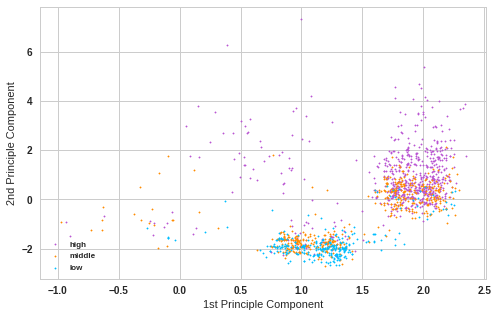

In [99]:
for (df, label) in zip(dfList3_1, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca3-1.png', format='png', dpi=200)

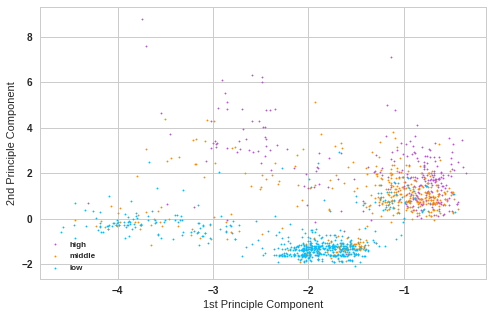

In [100]:
for (df, label) in zip(dfList3_2, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca3-2.png', format='png', dpi=200)

### 2D-Projection

In [177]:
data_coded = pd.get_dummies(data)
dataNomolizaed = (data_coded - data_coded.mean())/data_coded.std()
dataNomolizaed['pricelabel'] = X_tilde1.label
dataNomolizaed['satisfictionLabel'] = X_tilde2.label
display(dataNomolizaed.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,...,property_type_Dorm,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,pricelabel,satisfictionLabel
0,-0.534129,-0.199494,0.711284,-0.237676,-0.703763,0.916664,-1.151817,-1.106155,1.160779,-0.155853,...,-0.027022,-0.033101,-0.027022,3.748308,-0.168873,-0.057396,-0.019104,-0.115364,low,high
1,-0.534129,-0.052032,0.711284,-0.237676,-0.386501,0.012473,1.373731,-1.106155,1.160779,-0.155853,...,-0.027022,-0.033101,-0.027022,-0.266690,-0.168873,-0.057396,-0.019104,-0.115364,middle,high
2,-0.534129,-0.523912,0.711284,-0.237676,-0.530711,0.758646,2.085452,-1.106155,1.160779,-0.155853,...,-0.027022,-0.033101,-0.027022,-0.266690,-0.168873,-0.057396,-0.019104,-0.115364,low,high
3,0.517623,-0.376449,0.711284,-0.237676,-0.386501,0.390592,-0.789974,-1.106155,1.160779,-0.155853,...,-0.027022,-0.033101,-0.027022,3.748308,-0.168873,-0.057396,-0.019104,-0.115364,middle,high
4,-0.534129,-0.612389,-1.732807,-0.237676,-0.458606,0.590178,-1.687152,-1.106155,1.160779,-0.155853,...,-0.027022,-0.033101,-0.027022,3.748308,-0.168873,-0.057396,-0.019104,-0.115364,middle,low


In [195]:
data.room_type.value_counts()

Entire home/apt    1508
Private room       1167
Shared room          65
Name: room_type, dtype: int64

In [197]:
dfListPair1 = []
dfListPair4 = []
dfListPair3 = []
marker1 = {'low':'2','middle':'1','high':'3'}
labels3 = ['Manhattan', 'Brooklyn']
labels4 = ['Entire home/apt', 'Private room', 'Shared room']
for label in labels1:
    dfListPair1.append(data[X_tilde1.label.map(lambda x: x == label)])
for label in labels2:
    dfListPair2.append(data[X_tilde2.label.map(lambda x: x == label)])
for label in labels3:
    dfListPair3.append(data[data.borough.map(lambda x: x == label)])
for label in labels4:
    dfListPair4.append(data[data.room_type.map(lambda x: x == label)])

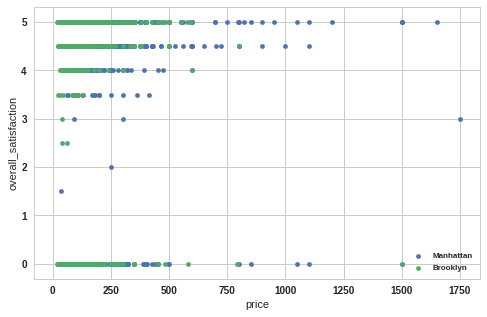

In [214]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.overall_satisfaction, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("overall_satisfaction")
plt.legend(loc = 'lower right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-over-price1.png', format='png', dpi=200)

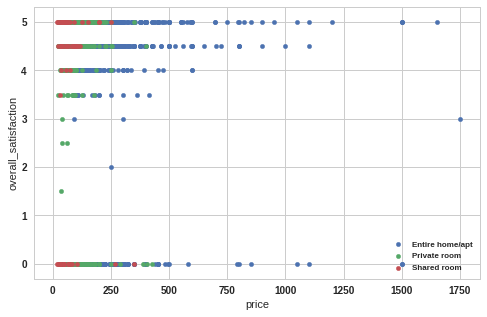

In [213]:
for (df, label) in zip(dfListPair4, labels4):
    pairPlt = plt.scatter(x = df.price, y = df.overall_satisfaction, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("overall_satisfaction")
plt.legend(loc = 'lower right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-over-price2.png', format='png', dpi=200)

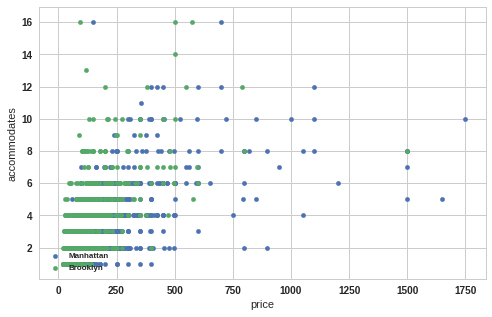

In [191]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.accommodates, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("accommodates")
plt.legend(loc = 'lower left',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-acc-price.png', format='png', dpi=200)

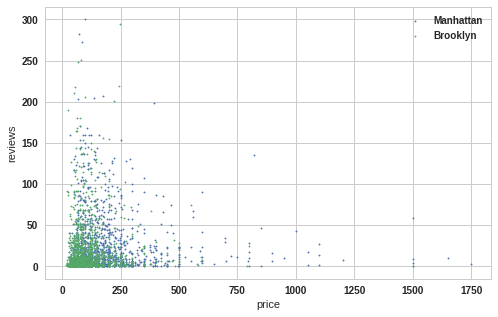

In [206]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.reviews, s =2, label=label)
plt.xlabel("price")
plt.ylabel("reviews")
plt.legend(loc = 'upper right',prop={'size':10})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-reviews-price1.png', format='png', dpi=200)

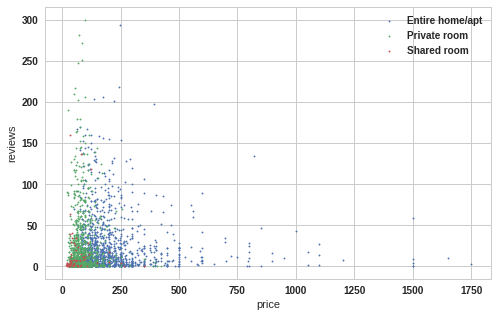

In [205]:
for (df, label) in zip(dfListPair4, labels4):
    pairPlt = plt.scatter(x = df.price, y = df.reviews, s =2, label=label)
plt.xlabel("price")
plt.ylabel("reviews")
plt.legend(loc = 'upper right',prop={'size':10})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-reviews-price2.png', format='png', dpi=200)

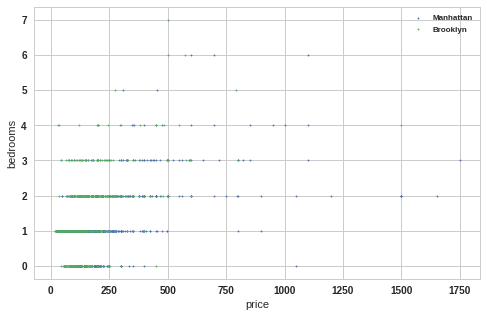

In [210]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.bedrooms, s = 2, label=label)
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

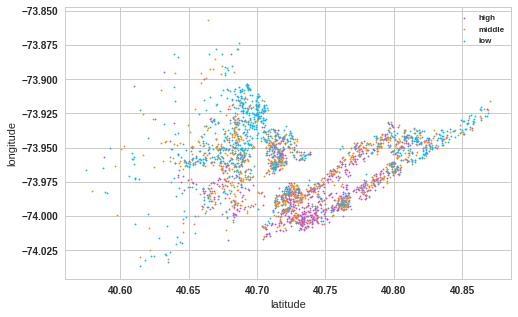

In [211]:
for (df, label) in zip(dfListPair1, labels1):
    pairPlt = plt.scatter(x = df.latitude, y = df.longitude, s = 2,color = color1[label], label=label)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

### SOM of the dataset

In [271]:
dataNomolizaed.columns

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Cave',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Timeshare', 'property_type_Townhouse', 'pricelabel',
       'satisfictionLabel'],
      dtype='object')

In [283]:
somdata1 = np.array(dataNomolizaed.drop(axis=1, labels=['price', 'pricelabel', 'satisfictionLabel']))
print(somdata1.shape)

(2740, 23)


In [282]:
somdata1.head()

,accommodates,reviews,overall_satisfaction,bedrooms,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,borough_Brooklyn,...,property_type_Cave,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse
0,-0.534129,-0.199494,0.711284,-0.237676,0.916664,-1.151817,-1.106155,1.160779,-0.155853,1.060010,...,-0.019104,-0.103408,-0.027022,-0.033101,-0.027022,3.748308,-0.168873,-0.057396,-0.019104,-0.115364
1,-0.534129,-0.052032,0.711284,-0.237676,0.012473,1.373731,-1.106155,1.160779,-0.155853,-0.943043,...,-0.019104,-0.103408,-0.027022,-0.033101,-0.027022,-0.266690,-0.168873,-0.057396,-0.019104,-0.115364
2,-0.534129,-0.523912,0.711284,-0.237676,0.758646,2.085452,-1.106155,1.160779,-0.155853,-0.943043,...,-0.019104,-0.103408,-0.027022,-0.033101,-0.027022,-0.266690,-0.168873,-0.057396,-0.019104,-0.115364
3,0.517623,-0.376449,0.711284,-0.237676,0.390592,-0.789974,-1.106155,1.160779,-0.155853,1.060010,...,-0.019104,-0.103408,-0.027022,-0.033101,-0.027022,3.748308,-0.168873,-0.057396,-0.019104,-0.115364
4,-0.534129,-0.612389,-1.732807,-0.237676,0.590178,-1.687152,-1.106155,1.160779,-0.155853,1.060010,...,-0.019104,-0.103408,-0.027022,-0.033101,-0.027022,3.748308,-0.168873,-0.057396,-0.019104,-0.115364


##

In [284]:
from minisom import MiniSom 
som = MiniSom(16, 16, 23, sigma=0.8, learning_rate=0.7) 
som.train_random(somdata1,1000) # trains the SOM with 100 iterations

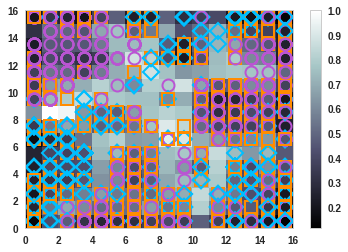

In [295]:
#Plot som
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

# use different colors and markers for each label
markers1 = {'high':'o','middle':'s','low':'D'}
for cnt,xx in enumerate(somdata1):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers1[dataNomolizaed.loc[cnt,'pricelabel']],markerfacecolor='None',
         markeredgecolor=color1[dataNomolizaed.loc[cnt,'pricelabel']],markersize=12,markeredgewidth=2)
plt.savefig('images/som-price.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

In [291]:
somdata2 = np.array(dataNomolizaed.drop(axis=1, labels=['overall_satisfaction',
                                                        'pricelabel', 'satisfictionLabel']))
print(somdata2.shape)

(2740, 23)


In [279]:
from minisom import MiniSom 
som = MiniSom(16, 16, 23, sigma=0.8, learning_rate=0.7) 
som.train_random(somdata2,1000) # trains the SOM with 100 iterations

(2740, 23)

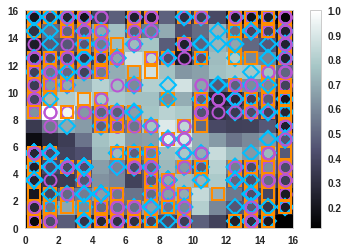

In [294]:
#Plot som
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

# use different colors and markers for each label
markers2 = {'high':'o','median':'s','low':'D'}
for cnt,xx in enumerate(somdata2):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers2[dataNomolizaed.loc[cnt,'satisfictionLabel']],markerfacecolor='None',
         markeredgecolor=color2[dataNomolizaed.loc[cnt,'satisfictionLabel']],markersize=12,markeredgewidth=2)

plt.savefig('images/som-satisfication.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

#### What about codebook vectors?

### Clustering